In [1]:
import numpy as np
import sys
#np.set_printoptions(precision=5, linewidth=200, suppress=True)
import psi4
from helper_PFCI import PFHamiltonianGenerator
from helper_PFCI import Determinant
from helper_cqed_rhf import cqed_rhf
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)

For both lambda = 0.01 and 0.08 do:
- Do Minimal basis pCQED (Nel = 2, Np = 2)
- Do large basis pCQED (Nel = 50, Np = 10)
- Do minimal basis QED-FCI (Np = 1)
- Do large basis QED-FCI (Np = 6)

In [ ]:
# options for mgf
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    "save_jk" : True
}


psi4.set_options(options_dict)
mol = psi4.geometry(mol_str)


In [2]:
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

pcqed_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 0
}

scqed_dict_np1 = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.01]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 1
}

scqed_dict_np6 = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.01]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 6
}


mol = psi4.geometry(mol_str)
psi4.set_options(options_dict)

pcqed_res = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    pcqed_dict
)

scqed_res_np1 = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    scqed_dict_np1
)

scqed_res_np6 = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    scqed_dict_np6
)

print(np.shape(pcqed_res.H_PF))
print(np.shape(scqed_res_np1.H_PF))
print(np.shape(scqed_res_np6.H_PF))


Start SCF iterations:

Canonical RHF One-electron energy = -12.5626302721254959
CQED-RHF One-electron energy      = -12.5626302721254959
Nuclear repulsion energy          = 1.0583544213400000
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8633576215383263   dE = -7.86336E+00   dRMS = 3.54673E-13
SCF Iteration   2: Energy = -7.8633576215383370   dE = -1.06581E-14   dRMS = 7.99578E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86335762 hartree
Psi4  SCF energy: -7.86335762 hartree
 Completed QED-RHF in 0.28463292121887207 seconds
 Completed 1HSO Build in 5.5789947509765625e-05 seconds
 Completed ERI Build in 0.0011420249938964844 seconds 
 Completed 2D build in 7.915496826171875e-05 seconds
 Completed 1G build in 1.3828277587890625e-05 seconds
 Completed the Dipole Matrix Build in 4.124641418457031e-05 seconds
 Completed determinant list in 0.0004649162292480469 seconds 
 Completed constant offset matrix in 0.00012588500976

In [3]:
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""

mol_str = """
Li
H 1 1.5
symmetry c1
"""

N_R = 40
N_el = 50
r_array = np.linspace(1.4, 2.0, N_R)

# for pcqed results
E_array = np.zeros((N_R, N_el))
Mu_array = np.zeros((N_R, N_el, N_el, 3))

# scqed results
sc_np1_E_array = np.zeros((N_R, 10))
sc_np6_E_array = np.zeros((N_R, 10))

psi4.set_options(options_dict)

r_idx = 0
for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy = psi4.energy('fci',ref_wfn=wfn)
    
    # pcqed results
    pcqed_res = PFHamiltonianGenerator(mol_str, options_dict, pcqed_dict)
    assert np.isclose(fci_energy, pcqed_res.CIeigs[0], 1e-7)
    
    # sort out states with dipole-allowed transition from ground state
    singlet_states = pcqed_res.sort_dipole_allowed_states( N_el)
    
    # store values
    E_array[r_idx, :] = pcqed_res.CIeigs[singlet_states]
    Mu_array[r_idx, :, :, :] = pcqed_res.compute_dipole_moments(singlet_states)
    
    # scqed results
    cqed_res_np1 = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict_np1)
    sc_np1_E_array[r_idx, :] = cqed_res_np1.CIeigs[:10]
    
    cqed_res_np6 = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict_np6)
    sc_np6_E_array[r_idx, :] = cqed_res_np6.CIeigs[:10]
    

    
    r_idx += 1




Li
H 1 1.4
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.6946346236295895
CQED-RHF One-electron energy      = -12.6946346236295895
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8605386610570385   dE = -7.86054E+00   dRMS = 1.78770E-13
SCF Iteration   2: Energy = -7.8605386610570473   dE = -8.88178E-15   dRMS = 3.97284E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86053866 hartree
Psi4  SCF energy: -7.86053866 hartree
 Completed QED-RHF in 0.08907318115234375 seconds
 Completed 1HSO Build in 5.030632019042969e-05 seconds
 Completed ERI Build in 0.0011568069458007812 seconds 
 Completed 2D build in 7.295608520507812e-05 seconds
 Completed 1G build in 1.4066696166992188e-05 seconds
 Completed the Dipole Matrix Build in 3.886222839355469e-05 seconds
 Completed determinant list in 0.0004429817199707031 seconds 
 Completed constant offset ma

 Completed Hamiltonian build in 0.7018139362335205 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.6529469247599664
CQED-RHF One-electron energy      = -12.6523896768368100
Nuclear repulsion energy          = 1.1095651191467744
Dipole energy                     = 0.0005261826934459
SCF Iteration   1: Energy = -7.8617869084084511   dE = -7.86179E+00   dRMS = 1.27815E-05
SCF Iteration   2: Energy = -7.8617869168924006   dE = -8.48395E-09   dRMS = 1.79902E-06
SCF Iteration   3: Energy = -7.8617869173283275   dE = -4.35927E-10   dRMS = 7.43007E-07
SCF Iteration   4: Energy = -7.8617869174308428   dE = -1.02515E-10   dRMS = 1.02944E-08
SCF Iteration   5: Energy = -7.8617869174308499   dE = -7.10543E-15   dRMS = 1.20083E-10
SCF Iteration   6: Energy = -7.8617869174308552   dE = -5.32907E-15   dRMS = 3.82317E-13
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.86178692 hartree
Psi4  SCF energy: -7.86194396 hartree
 Completed QED-RHF in 0.090285062789

 Completed Hamiltonian build in 0.6842188835144043 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.6122245277261040
CQED-RHF One-electron energy      = -12.6116553211755846
Nuclear repulsion energy          = 1.0862058534805263
Dipole energy                     = 0.0005361950132177
SCF Iteration   1: Energy = -7.8626939045438906   dE = -7.86269E+00   dRMS = 1.27871E-05
SCF Iteration   2: Energy = -7.8626939136497320   dE = -9.10584E-09   dRMS = 2.07469E-06
SCF Iteration   3: Energy = -7.8626939142763455   dE = -6.26613E-10   dRMS = 8.90454E-07
SCF Iteration   4: Energy = -7.8626939144235095   dE = -1.47164E-10   dRMS = 1.33915E-08
SCF Iteration   5: Energy = -7.8626939144235219   dE = -1.24345E-14   dRMS = 1.88420E-10
SCF Iteration   6: Energy = -7.8626939144235237   dE = -1.77636E-15   dRMS = 5.10446E-13
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.86269391 hartree
Psi4  SCF energy: -7.86285357 hartree
 Completed QED-RHF in 0.086502075195

 Completed Hamiltonian build in 0.6777043342590332 seconds

Li
H 1 1.5076923076923077
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.5528810058108178
CQED-RHF One-electron energy      = -12.5528810058108178
Nuclear repulsion energy          = 1.0529546538841843
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8633801044051310   dE = -7.86338E+00   dRMS = 3.76883E-13
SCF Iteration   2: Energy = -7.8633801044051364   dE = -5.32907E-15   dRMS = 8.51385E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86338010 hartree
Psi4  SCF energy: -7.86338010 hartree
 Completed QED-RHF in 0.08546876907348633 seconds
 Completed 1HSO Build in 6.29425048828125e-05 seconds
 Completed ERI Build in 0.0011401176452636719 seconds 
 Completed 2D build in 0.0002689361572265625 seconds
 Completed 1G build in 0.00010800361633300781 seconds
 Completed the Dipole Matrix Build in 0.00014591217041015625 seconds
 Completed determ

 Completed Hamiltonian build in 0.6833200454711914 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.5144332439320021
CQED-RHF One-electron energy      = -12.5138327867219346
Nuclear repulsion energy          = 1.0318955608065001
Dipole energy                     = 0.0005620013604232
SCF Iteration   1: Energy = -7.8630608098921382   dE = -7.86306E+00   dRMS = 1.30063E-05
SCF Iteration   2: Energy = -7.8630608212562567   dE = -1.13641E-08   dRMS = 2.85077E-06
SCF Iteration   3: Energy = -7.8630608225694125   dE = -1.31316E-09   dRMS = 1.23790E-06
SCF Iteration   4: Energy = -7.8630608228544219   dE = -2.85009E-10   dRMS = 2.18593E-08
SCF Iteration   5: Energy = -7.8630608228544538   dE = -3.19744E-14   dRMS = 3.24865E-10
SCF Iteration   6: Energy = -7.8630608228544592   dE = -5.32907E-15   dRMS = 9.29249E-13
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.86306082 hartree
Psi4  SCF energy: -7.86322763 hartree
 Completed QED-RHF in 0.087526798248

 Completed Hamiltonian build in 0.6723997592926025 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.4768420630333345
CQED-RHF One-electron energy      = -12.4762285508325164
Nuclear repulsion energy          = 1.0116623145161765
Dipole energy                     = 0.0005726434136208
SCF Iteration   1: Energy = -7.8625422693286247   dE = -7.86254E+00   dRMS = 1.31776E-05
SCF Iteration   2: Energy = -7.8625422819036448   dE = -1.25750E-08   dRMS = 3.18690E-06
SCF Iteration   3: Energy = -7.8625422835871071   dE = -1.68346E-09   dRMS = 1.36894E-06
SCF Iteration   4: Energy = -7.8625422839364489   dE = -3.49342E-10   dRMS = 2.53983E-08
SCF Iteration   5: Energy = -7.8625422839364969   dE = -4.79616E-14   dRMS = 3.75972E-10
SCF Iteration   6: Energy = -7.8625422839365005   dE = -3.55271E-15   dRMS = 1.13771E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.86254228 hartree
Psi4  SCF energy: -7.86271221 hartree
 Completed QED-RHF in 0.087426900863

 Completed Hamiltonian build in 0.7108137607574463 seconds

Li
H 1 1.6153846153846154
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.4219988259780791
CQED-RHF One-electron energy      = -12.4219988259780791
Nuclear repulsion energy          = 0.9827576769585715
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8613255001488325   dE = -7.86133E+00   dRMS = 2.32227E-15
SCF Iteration   2: Energy = -7.8613255001488342   dE = -1.77636E-15   dRMS = 6.62853E-16
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86132550 hartree
Psi4  SCF energy: -7.86132550 hartree
 Completed QED-RHF in 0.2205040454864502 seconds
 Completed 1HSO Build in 8.20159912109375e-05 seconds
 Completed ERI Build in 0.0014431476593017578 seconds 
 Completed 2D build in 0.0001609325408935547 seconds
 Completed 1G build in 7.677078247070312e-05 seconds
 Completed the Dipole Matrix Build in 7.915496826171875e-05 seconds
 Completed determina

 Completed Hamiltonian build in 0.6985456943511963 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.3864261193403546
CQED-RHF One-electron energy      = -12.3857785420758724
Nuclear repulsion energy          = 0.9643883745855140
Dipole energy                     = 0.0006000662574162
SCF Iteration   1: Energy = -7.8598540766019269   dE = -7.85985E+00   dRMS = 1.38147E-05
SCF Iteration   2: Energy = -7.8598540930790080   dE = -1.64771E-08   dRMS = 4.07982E-06
SCF Iteration   3: Energy = -7.8598540959725725   dE = -2.89356E-09   dRMS = 1.68061E-06
SCF Iteration   4: Energy = -7.8598540965040531   dE = -5.31481E-10   dRMS = 3.47554E-08
SCF Iteration   5: Energy = -7.8598540965041508   dE = -9.76996E-14   dRMS = 5.07644E-10
SCF Iteration   6: Energy = -7.8598540965041508   dE =  0.00000E+00   dRMS = 1.78288E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85985410 hartree
Psi4  SCF energy: -7.86003248 hartree
 Completed QED-RHF in 0.100173234939

 Completed Hamiltonian build in 0.6785862445831299 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.3516150820279371
CQED-RHF One-electron energy      = -12.3509532968263684
Nuclear repulsion energy          = 0.9466931750518348
Dipole energy                     = 0.0006113644096880
SCF Iteration   1: Energy = -7.8582920001319598   dE = -7.85829E+00   dRMS = 1.41515E-05
SCF Iteration   2: Energy = -7.8582920185568712   dE = -1.84249E-08   dRMS = 4.45699E-06
SCF Iteration   3: Energy = -7.8582920220632753   dE = -3.50640E-09   dRMS = 1.80054E-06
SCF Iteration   4: Energy = -7.8582920226765145   dE = -6.13239E-10   dRMS = 3.87851E-08
SCF Iteration   5: Energy = -7.8582920226766424   dE = -1.27898E-13   dRMS = 5.63758E-10
SCF Iteration   6: Energy = -7.8582920226766442   dE = -1.77636E-15   dRMS = 2.10399E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85829202 hartree
Psi4  SCF energy: -7.85847407 hartree
 Completed QED-RHF in 0.091003894805

 Completed Hamiltonian build in 0.6944561004638672 seconds

Li
H 1 1.7230769230769232
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.3007742907454212
CQED-RHF One-electron energy      = -12.3007742907454212
Nuclear repulsion energy          = 0.9213353221486607
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8556885060928039   dE = -7.85569E+00   dRMS = 4.02566E-15
SCF Iteration   2: Energy = -7.8556885060928003   dE =  3.55271E-15   dRMS = 9.96629E-16
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.85568851 hartree
Psi4  SCF energy: -7.85568851 hartree
 Completed QED-RHF in 0.0904240608215332 seconds
 Completed 1HSO Build in 4.982948303222656e-05 seconds
 Completed ERI Build in 0.0011379718780517578 seconds 
 Completed 2D build in 7.319450378417969e-05 seconds
 Completed 1G build in 1.3828277587890625e-05 seconds
 Completed the Dipole Matrix Build in 3.814697265625e-05 seconds
 Completed determinan

 Completed Hamiltonian build in 0.6896219253540039 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2677648503279677
CQED-RHF One-electron energy      = -12.2670660598423940
Nuclear repulsion energy          = 0.9051715445671054
Dipole energy                     = 0.0006404264308947
SCF Iteration   1: Energy = -7.8533710661253409   dE = -7.85337E+00   dRMS = 1.51892E-05
SCF Iteration   2: Energy = -7.8533710905286647   dE = -2.44033E-08   dRMS = 5.44973E-06
SCF Iteration   3: Energy = -7.8533710959442136   dE = -5.41555E-09   dRMS = 2.09504E-06
SCF Iteration   4: Energy = -7.8533710967884929   dE = -8.44279E-10   dRMS = 4.98881E-08
SCF Iteration   5: Energy = -7.8533710967887167   dE = -2.23821E-13   dRMS = 7.17097E-10
SCF Iteration   6: Energy = -7.8533710967887167   dE =  0.00000E+00   dRMS = 3.13989E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85337110 hartree
Psi4  SCF energy: -7.85356300 hartree
 Completed QED-RHF in 0.091194152832

 Completed Hamiltonian build in 0.6784157752990723 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2354383952121779
CQED-RHF One-electron energy      = -12.2347242010342629
Nuclear repulsion energy          = 0.8895651386262932
Dipole energy                     = 0.0006523725542087
SCF Iteration   1: Energy = -7.8510485307974252   dE = -7.85105E+00   dRMS = 1.56790E-05
SCF Iteration   2: Energy = -7.8510485580832166   dE = -2.72858E-08   dRMS = 5.86718E-06
SCF Iteration   3: Energy = -7.8510485644312586   dE = -6.34804E-09   dRMS = 2.21283E-06
SCF Iteration   4: Energy = -7.8510485653808404   dE = -9.49582E-10   dRMS = 5.48397E-08
SCF Iteration   5: Energy = -7.8510485653811104   dE = -2.70006E-13   dRMS = 7.84723E-10
SCF Iteration   6: Energy = -7.8510485653811068   dE =  3.55271E-15   dRMS = 3.68176E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85104857 hartree
Psi4  SCF energy: -7.85124471 hartree
 Completed QED-RHF in 0.091188907623

 Completed Hamiltonian build in 0.6875898838043213 seconds

Li
H 1 1.8307692307692307
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.1881865212876264
CQED-RHF One-electron energy      = -12.1881865212876264
Nuclear repulsion energy          = 0.8671391267281512
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8474430129260213   dE = -7.84744E+00   dRMS = 5.60325E-15
SCF Iteration   2: Energy = -7.8474430129260284   dE = -7.10543E-15   dRMS = 1.44500E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.84744301 hartree
Psi4  SCF energy: -7.84744301 hartree
 Completed QED-RHF in 0.12412500381469727 seconds
 Completed 1HSO Build in 6.079673767089844e-05 seconds
 Completed ERI Build in 0.001219034194946289 seconds 
 Completed 2D build in 8.511543273925781e-05 seconds
 Completed 1G build in 1.8835067749023438e-05 seconds
 Completed the Dipole Matrix Build in 4.100799560546875e-05 seconds
 Completed determi

 Completed Hamiltonian build in 0.6893389225006104 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1574837631191599
CQED-RHF One-electron energy      = -12.1567295371487685
Nuclear repulsion energy          = 0.8528062486004133
Dipole energy                     = 0.0006830120100430
SCF Iteration   1: Energy = -7.8445074221500795   dE = -7.84451E+00   dRMS = 1.70775E-05
SCF Iteration   2: Energy = -7.8445074580465617   dE = -3.58965E-08   dRMS = 6.96401E-06
SCF Iteration   3: Energy = -7.8445074672129822   dE = -9.16642E-09   dRMS = 2.51471E-06
SCF Iteration   4: Energy = -7.8445074684686427   dE = -1.25566E-09   dRMS = 6.88379E-08
SCF Iteration   5: Energy = -7.8445074684690850   dE = -4.42313E-13   dRMS = 9.72585E-10
SCF Iteration   6: Energy = -7.8445074684690868   dE = -1.77636E-15   dRMS = 5.51516E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.84450747 hartree
Psi4  SCF energy: -7.84471500 hartree
 Completed QED-RHF in 0.090656042098

 Completed Hamiltonian build in 0.6808397769927979 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1273997703384548
CQED-RHF One-electron energy      = -12.1266289188117984
Nuclear repulsion energy          = 0.8389394803304878
Dipole energy                     = 0.0006955654324979
SCF Iteration   1: Energy = -7.8416362275528648   dE = -7.84164E+00   dRMS = 1.77029E-05
SCF Iteration   2: Energy = -7.8416362675143070   dE = -3.99614E-08   dRMS = 7.42489E-06
SCF Iteration   3: Energy = -7.8416362780240689   dE = -1.05098E-08   dRMS = 2.64067E-06
SCF Iteration   4: Energy = -7.8416362794235113   dE = -1.39944E-09   dRMS = 7.51920E-08
SCF Iteration   5: Energy = -7.8416362794240460   dE = -5.34683E-13   dRMS = 1.05606E-09
SCF Iteration   6: Energy = -7.8416362794240460   dE =  0.00000E+00   dRMS = 6.50524E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.84163628 hartree
Psi4  SCF energy: -7.84184869 hartree
 Completed QED-RHF in 0.092245101928

 Completed Hamiltonian build in 0.6822893619537354 seconds

Li
H 1 1.9384615384615385
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.0833989768031671
CQED-RHF One-electron energy      = -12.0833989768031671
Nuclear repulsion energy          = 0.8189647307988096
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8373179415350815   dE = -7.83732E+00   dRMS = 5.28308E-15
SCF Iteration   2: Energy = -7.8373179415350922   dE = -1.06581E-14   dRMS = 1.42360E-15
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.83731794 hartree
Psi4  SCF energy: -7.83731794 hartree
 Completed QED-RHF in 0.0905909538269043 seconds
 Completed 1HSO Build in 5.0067901611328125e-05 seconds
 Completed ERI Build in 0.0011451244354248047 seconds 
 Completed 2D build in 7.176399230957031e-05 seconds
 Completed 1G build in 1.4066696166992188e-05 seconds
 Completed the Dipole Matrix Build in 3.910064697265625e-05 seconds
 Completed determ

 Completed Hamiltonian build in 0.6879911422729492 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0547933167787225
CQED-RHF One-electron energy      = -12.0539793621023001
Nuclear repulsion energy          = 0.8061684068800781
Dipole energy                     = 0.0007276424195768
SCF Iteration   1: Energy = -7.8339348345781570   dE = -7.83393E+00   dRMS = 1.94199E-05
SCF Iteration   2: Energy = -7.8339348864714893   dE = -5.18933E-08   dRMS = 8.63597E-06
SCF Iteration   3: Energy = -7.8339349009556010   dE = -1.44841E-08   dRMS = 2.97613E-06
SCF Iteration   4: Energy = -7.8339349027859591   dE = -1.83036E-09   dRMS = 9.33366E-08
SCF Iteration   5: Energy = -7.8339349027868099   dE = -8.50875E-13   dRMS = 1.28803E-09
SCF Iteration   6: Energy = -7.8339349027868082   dE =  1.77636E-15   dRMS = 9.90768E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.83393490 hartree
Psi4  SCF energy: -7.83416035 hartree
 Completed QED-RHF in 0.096060991287

 Completed Hamiltonian build in 0.6753289699554443 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0267536980505589
CQED-RHF One-electron energy      = -12.0259218858179064
Nuclear repulsion energy          = 0.7937658160050001
Dipole energy                     = 0.0007407322389519
SCF Iteration   1: Energy = -7.8306745004306384   dE = -7.83067E+00   dRMS = 2.01654E-05
SCF Iteration   2: Energy = -7.8306745578771677   dE = -5.74465E-08   dRMS = 9.14519E-06
SCF Iteration   3: Energy = -7.8306745742220043   dE = -1.63448E-08   dRMS = 3.12080E-06
SCF Iteration   4: Energy = -7.8306745762600984   dE = -2.03809E-09   dRMS = 1.01615E-07
SCF Iteration   5: Energy = -7.8306745762611216   dE = -1.02318E-12   dRMS = 1.39078E-09
SCF Iteration   6: Energy = -7.8306745762611234   dE = -1.77636E-15   dRMS = 1.17489E-11
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.83067458 hartree
Psi4  SCF energy: -7.83090558 hartree
 Completed QED-RHF in 0.090677976608

In [4]:
from matplotlib import pyplot as plt

safe_np1_1 = np.copy(sc_np1_E_array[:,1])
safe_np1_2 = np.copy(sc_np1_E_array[:,2])

safe_np6_1 = np.copy(sc_np6_E_array[:,1])
safe_np6_2 = np.copy(sc_np6_E_array[:,2])





In [13]:
sc_np1_E_array[:,1] = np.copy(safe_np1_1)
sc_np1_E_array[:,2] = np.copy(safe_np1_2)

sc_np6_E_array[:,1] = np.copy(safe_np6_1)
sc_np6_E_array[:,2] = np.copy(safe_np6_2)


In [14]:
ns = 8
np_1_lp = np.copy(sc_np1_E_array[:ns,1])
np_1_up = np.copy(sc_np1_E_array[:ns,2])

np_6_lp = np.copy(sc_np6_E_array[:ns,1])
np_6_up = np.copy(sc_np6_E_array[:ns,2])



In [15]:
sc_np1_E_array[:ns,1] = np.copy(np_1_up)
sc_np1_E_array[:ns,2] = np.copy(np_1_lp)

sc_np6_E_array[:ns,1] = np.copy(np_6_up)
sc_np6_E_array[:ns,2] = np.copy(np_6_lp)

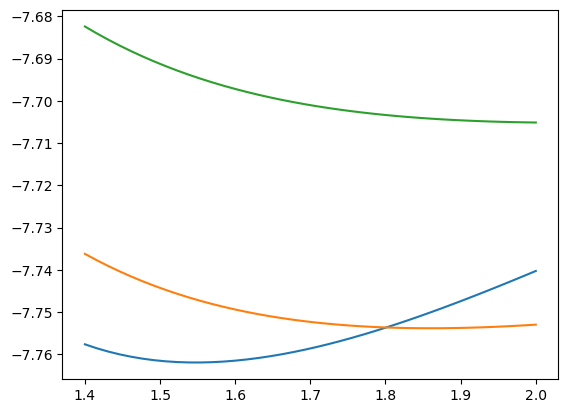

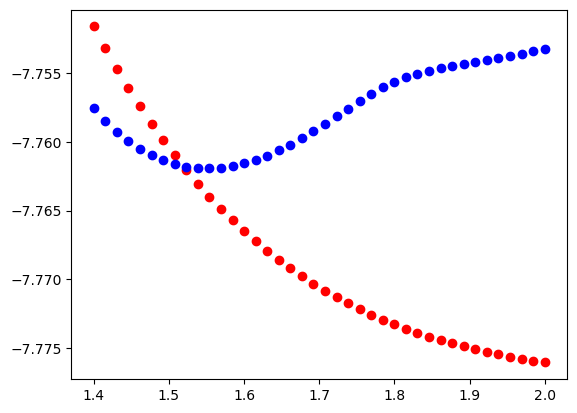

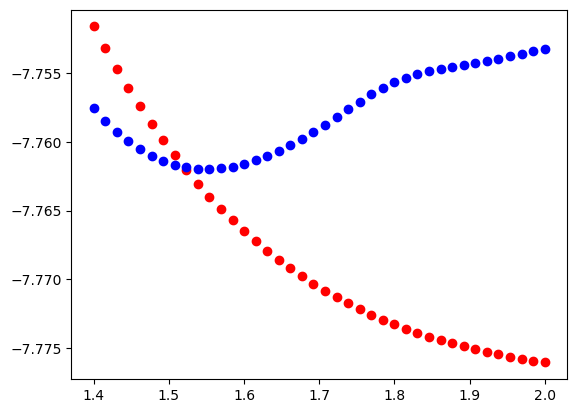

In [16]:
plt.plot(r_array, E_array[:,0]+0.1208, label="E0")
plt.plot(r_array, E_array[:,1], label="E1")
plt.plot(r_array, E_array[:,2], label="E2")
plt.show()


#plt.plot(r_array, sc_np1_E_array[:,0]+0.1208, label="E0")
plt.plot(r_array, sc_np1_E_array[:,1], 'ro', label="E1")
plt.plot(r_array, sc_np1_E_array[:,2], 'bo', label="E2")
plt.show()

#plt.plot(r_array, sc_np6_E_array[:,0]+0.1208, label="E0")
plt.plot(r_array, sc_np6_E_array[:,1], 'ro', label="E1")
plt.plot(r_array, sc_np6_E_array[:,2], 'bo', label="E2")
plt.show()



\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [17]:
def build_pf_hamiltonian(n_el, n_ph, E_R, omega, lamvec, mu):
    """
    Given an array of n_el E_R values and an n_ph states with fundamental energy omega
    build the PF Hamiltonian
    
    n_el : int
        the number of electronic states (n_el = 1 means only ground-state)
    
    n_ph : int
        the number of photon occupation states (n_ph = 1 means only the |0> state)
    
    E_R : np.array of floats
        the electronic energies
        
    omega : float
        the energy of the photonic mode
        
    lamvec : np.array of floats
        the lambda vector
        
    mu : (n_el x n_el x 3) np.array of floats 
        mu[i, j, k] is the kth cartesian component of the dipole moment expectation value between 
        state i and state j
    
    """
    H_PF = np.zeros((n_el * n_ph, n_el * n_ph))
    
    # take care of the diagonals first
    # bare electronic and photonic energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            H_PF[na,na] = E_R[a] + n * omega
        
    # diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for g in range(n_el):
                H_PF[na,na] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g,a,:])
            
    # off-diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for b in range(n_el):
                nb = n * n_el + b
                for g in range(n_el):
                    if a != b:
                        H_PF[na, nb] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g, b, :])
                
    # off-diagonal bilinear coupling
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            
            for m in range(n_ph):
                for b in range(n_el):
                    mb = m * n_el + b
                    
                    if n == (m-1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na,mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        
                    elif n == (m+1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na, mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1)
                        
    
    return H_PF


def MAE(E, Ep):
    """
    function to return the mean absolute error of the approximate PES stored in Ep relative to 
    the exact PES stored in E
    """
    # get length
    _NR = len(E)
    
    # take element-by-element difference
    _diff = E - Ep
    
    # compute absolute value of differences
    _absdiff = np.abs(_diff)
    
    # return sum divided by _NR
    return np.sum(_absdiff) / _NR
                
            

        
    
    

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [18]:
np.set_printoptions(precision=6, linewidth=200, suppress=True)
#omega_cav = 0.12086
#lambda_vector = np.array([0., 0., 0.08])
#N_el = 3
#N_ph = 2
omega_cav = 0.12086
lambda_vector = np.array([0, 0.0, 0.01])
N_el = 2
N_ph = 2

_HPF = build_pf_hamiltonian(N_el, N_ph, E_array[0,:], omega_cav, lambda_vector, Mu_array[0, :, :, :])
#print("H")
#print(_HPF)

_HPF_EDSE = np.array([
[-7.857786, -0.004725,  0.,       -0.011859],
[-0.004725, -7.729184, -0.011859,  0.      ],
[ 0.,       -0.011859, -7.736926, -0.004725],
[-0.011859,  0.,       -0.004725, -7.608324]
])


In [19]:
print(_HPF[0,0]-_HPF_EDSE[0,0])

-0.020482389057887573


In [20]:
N_el = 2
N_ph = 2
pcqed_nel2_np2 = np.zeros((N_R, N_el * N_ph ))
for k in range(N_R):           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)
    pcqed_nel2_np2[k,:] = pf_e



In [21]:
N_el = 50
N_ph = 7
pcqed_nel50_np7 = np.zeros((N_R, N_el * N_ph ))
for k in range(N_R):           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)
    pcqed_nel50_np7[k,:] = pf_e


In [22]:
from matplotlib import cm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

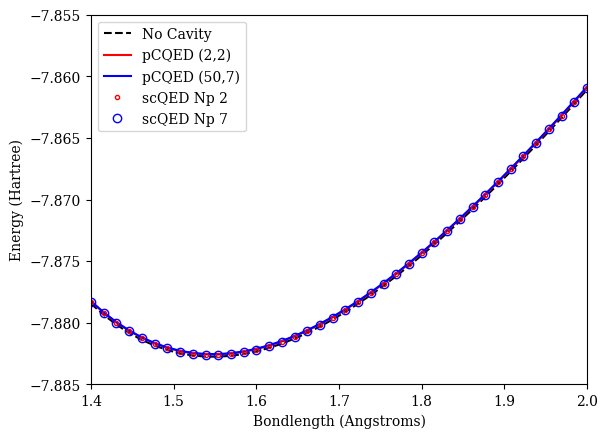

In [30]:
#plt.plot(r_array, Eg_QED_FCI_Np_1)
#sc_E_arrat_Np_6 = np.copy(sc_E_array)
plt.plot(r_array, E_array[:,0], 'black', linestyle="dashed", label="No Cavity")
plt.plot(r_array, pcqed_nel2_np2[:,0], 'red', label="pCQED (2,2)")
plt.plot(r_array, pcqed_nel50_np7[:,0], 'blue', label="pCQED (50,7)")
#plt.plot(r_array, pcqed_nel50_np7[:,0], color='black', linestyle='dashed', label="Eg pCQED (50,7)")
plt.plot(r_array, sc_np1_E_array[:,0], 'ro', ms = 3, mfc = 'none', label="scQED Np 2")
plt.plot(r_array, sc_np6_E_array[:,0], 'bo', ms = 6, mfc = 'none', label="scQED Np 7") # edgecolors='red')
plt.xlim(1.4, 2.0)
plt.ylim(-7.885, -7.855)
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.savefig("sto3g_lih_ground_state_lambda_01.png")
plt.show()


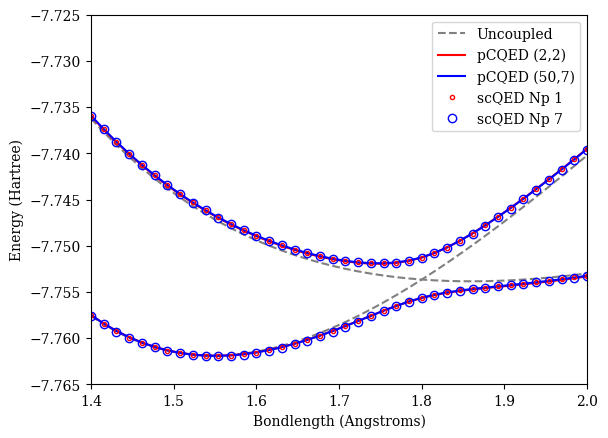

In [29]:
rcParams['font.size'] = 10
plt.plot(r_array, E_array[:,0]+0.12086, 'grey', linestyle="dashed", label="Uncoupled")
plt.plot(r_array, E_array[:,1], 'grey', linestyle="dashed")#, label="Ee Uncoupled")
plt.plot(r_array, pcqed_nel2_np2[:,1], 'red', label="pCQED (2,2)")
plt.plot(r_array, pcqed_nel2_np2[:,2], 'red')# label="pCQED (2,2)")
plt.plot(r_array, pcqed_nel50_np7[:,1], 'blue',  label="pCQED (50,7)")
plt.plot(r_array, pcqed_nel50_np7[:,2], 'blue')#,  label="pCQED (50,7)")
plt.plot(r_array, sc_np1_E_array[:,2], 'ro', ms = 3, mfc = 'none', label="scQED Np 1")
plt.plot(r_array, sc_np1_E_array[:,3], 'ro', ms = 3, mfc = 'none')#, label="scQED Np 1")
plt.plot(r_array, sc_np6_E_array[:,2], 'bo', ms = 6, mfc = 'none', label="scQED Np 7")
plt.plot(r_array, sc_np6_E_array[:,3], 'bo', ms = 6, mfc = 'none')#, label="scQED Np 7")
plt.xlim(1.4, 2.0)
plt.ylim(-7.765, -7.725)
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.savefig("sto3g_lih_lp_up_lambda_01.png")
plt.show()

In [ ]:
plt.plot(r_array, pcqed_nel50_np6[:,1], 'r--', label="LP pCQED (50,6)")
plt.plot(r_array, pcqed_nel50_np6[:,2], 'b--', label="UP pCQED (50,6)")
plt.plot(r_array, sc_E_arrat_Np_6[:,2], 'ro', label="LP CQED-FCI Np 6")
plt.plot(r_array, sc_E_arrat_Np_6[:,3], 'bo', label="UP CQED-FCI Np 6")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

In [ ]:
for i in range(N_R):
    print(F'{r_array[i]}, {pf_array[i,0]}, {pf_array[i,1]}, {pf_array[i,2]}, {pf_array[i,3]}, {pf_array[i,3]} ')
      